# Analyzing CIA Factbook Data Using SQLite and Python

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

In [5]:
q = 'SELECT * FROM sqlite_master WHERE type="table";'
pd.read_sql_query(q, conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [11]:
q2 = "SELECT * FROM facts LIMIT 5"
#first_five_facts = conn.execute(q2).fetchmany(5)
#print(first_five_facts)
pd.read_sql_query(q2,conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [12]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q3,conn)

MIN(population)  MAX(population)  MIN(population_growth)  \
0                0       7256490011                     0.0   

   MAX(population_growth)  
0                    4.02

### Observations of the last query
- There's at least 1 country with a population of 0 (which is odd)
- There's a country with a population about of 7.2 Billion (which is also odd)

Let's investigate

In [16]:
q4 = "SELECT * FROM facts WHERE population = 0"
pd.read_sql_query(q4, conn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None

In [18]:
q5 = "SELECT * FROM facts WHERE population = 7256490011"
pd.read_sql_query(q5, conn)

id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None

It seems to makes sense that the zero population location is _Antarctica_. But it seems that the _World_ location is a sum of all the columns, which also makes sense. This could be useful, but also throw off any summarizing of the data. 

## Histograms

I'm going to make some histograms excluding the outliers found in the last ivestigation of the data

In [24]:
q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE (id != 250 and id != 261) "
h = pd.read_sql_query(q6, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe75e7c3da0>,
      dtype=object)

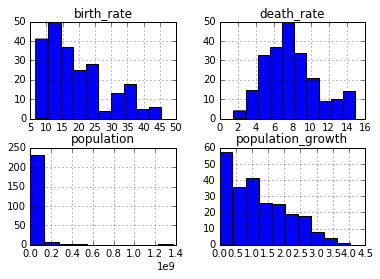

In [29]:
%matplotlib inline 
import matplotlib.pyplot as plt
pd.DataFrame.hist(h)
